In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_medidas = pd.read_excel('./dados/BD_Disjuntores.xlsx', sheet_name='Documentos de Medida')

In [3]:
df_cadastro =  pd.read_excel('./dados/BD_Disjuntores.xlsx', sheet_name='Cadastro')
df = pd.merge(df_cadastro, df_medidas, how='left', on='Equipamento', )
df.head()

,Equipamento,Fabricante,Modelo,Dt.entr.serviço,Classe,Ano construção,Código ABC,Tensão,Tipo Instalação,Ponto medição,...,Data,Valor teórico,LimInfIntMed.,LimSupIntMed.,ValMed/PosTCont,Unid.caracter.,Cód.valorização,Txt.code codif.,Denominação,Texto
0,270715,GENERAL ELECTRIC,GL314P,2019-09-07,S_DISJ_SF6,2017,C,230.0,Bay de Linha,467488.0,...,2015-09-27,NaN,0.0,NaN,0.0,UN,2.0,Não,Comp/tes Elétricos-Instrum Risco de Avar,5
1,270715,GENERAL ELECTRIC,GL314P,2019-09-07,S_DISJ_SF6,2017,C,230.0,Bay de Linha,9758414.0,...,2024-03-08,NaN,0.0,NaN,NaN,UN,2.0,Não,Comp/tes Elétricos-Instrum Risco de Avar,5
2,270715,GENERAL ELECTRIC,GL314P,2019-09-07,S_DISJ_SF6,2017,C,230.0,Bay de Linha,9758414.0,...,2021-11-24,NaN,0.0,NaN,NaN,UN,2.0,Não,Comp/tes Elétricos-Instrum Risco de Avar,5
3,270715,GENERAL ELECTRIC,GL314P,2019-09-07,S_DISJ_SF6,2017,C,230.0,Bay de Linha,9758413.0,...,2024-03-08,NaN,0.0,NaN,NaN,UN,2.0,Não,Comp/tes Mecânicos com Risco de Avaria,5
4,270715,GENERAL ELECTRIC,GL314P,2019-09-07,S_DISJ_SF6,2017,C,230.0,Bay de Linha,9758413.0,...,2021-11-24,NaN,0.0,NaN,NaN,UN,2.0,Não,Comp/tes Mecânicos com Risco de Avaria,5


In [5]:
len(df_cadastro['Equipamento'].unique()), len(df_medidas['Equipamento'].unique())

(2827, 2663)

In [6]:
df_cadastro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2827 entries, 0 to 2826
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Equipamento      2827 non-null   int64         
 1   Fabricante       2827 non-null   object        
 2   Modelo           2810 non-null   object        
 3   Dt.entr.serviço  2826 non-null   datetime64[ns]
 4   Classe           2827 non-null   object        
 5   Ano construção   2827 non-null   int64         
 6   Código ABC       2827 non-null   object        
 7   Tensão           2827 non-null   float64       
 8   Tipo Instalação  2827 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(5)
memory usage: 198.9+ KB


In [8]:
df2 = pd.merge(df_medidas, df_cadastro, how='left', on='Equipamento')
df2['Fabricante'].isna().any()

np.True_

In [9]:
df2[df2['Fabricante'].isna()].head()

,Equipamento,Ponto medição,Doc.medição,Data,Valor teórico,LimInfIntMed.,LimSupIntMed.,ValMed/PosTCont,Unid.caracter.,Cód.valorização,...,Denominação,Texto,Fabricante,Modelo,Dt.entr.serviço,Classe,Ano construção,Código ABC,Tensão,Tipo Instalação
18,467509,467492,732683,2015-09-27,1.0,0.0,1.0,0.29,%,NaN,...,Fator de Potencia Bucha B2 Fase A,Ensaio realizado 12/05/2009,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN


In [10]:
del df2
del df_medidas, df_cadastro

In [12]:
df.describe()

,Equipamento,Dt.entr.serviço,Ano construção,Tensão,Ponto medição,Doc.medição,Data,Valor teórico,LimInfIntMed.,LimSupIntMed.,ValMed/PosTCont,Cód.valorização
count,143163.000000,143144,143163.000000,143163.000000,1.429980e+05,1.429980e+05,142998,106362.000000,113232.000000,7.028700e+04,1.339640e+05,13737.000000
mean,188875.599471,2001-06-20 16:16:14.593416320,1997.836222,219.044727,3.089195e+06,4.127656e+06,2021-09-23 16:52:43.009273088,2213.070112,1929.034940,1.077169e+06,5.542112e+07,2.012084
min,127874.000000,1960-01-01 00:00:00,1947.000000,6.600000,1.017970e+05,1.856400e+04,2002-03-06 00:00:00,-21.000000,-60.000000,-1.500000e+01,-6.000000e+01,1.000000
25%,129193.000000,1985-10-01 00:00:00,1980.000000,88.000000,2.789752e+05,2.064732e+06,2020-03-10 00:00:00,21.500000,0.000000,1.440000e+01,1.520000e+01,2.000000
50%,158150.000000,2006-09-03 00:00:00,2005.000000,138.000000,4.619865e+05,4.080962e+06,2022-06-20 00:00:00,47.000000,20.000000,4.000000e+01,4.000000e+01,2.000000
75%,223956.000000,2013-08-09 00:00:00,2011.000000,440.000000,4.991261e+06,6.335042e+06,2024-02-13 00:00:00,120.000000,85.000000,9.000000e+01,1.696000e+02,2.000000
max,501479.000000,2025-01-09 00:00:00,2024.000000,550.000000,1.014866e+07,7.970217e+06,2025-02-14 00:00:00,999999.000000,210000.000000,1.000000e+08,7.370000e+12,5.000000
std,76348.000440,NaN,17.613254,168.970734,3.629881e+06,2.428139e+06,NaN,17026.397748,13605.378764,1.032194e+07,2.013601e+10,0.433222


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143163 entries, 0 to 143162
Data columns (total 21 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Equipamento      143163 non-null  int64         
 1   Fabricante       143163 non-null  object        
 2   Modelo           143146 non-null  object        
 3   Dt.entr.serviço  143144 non-null  datetime64[ns]
 4   Classe           143163 non-null  object        
 5   Ano construção   143163 non-null  int64         
 6   Código ABC       143163 non-null  object        
 7   Tensão           143163 non-null  float64       
 8   Tipo Instalação  143163 non-null  object        
 9   Ponto medição    142998 non-null  float64       
 10  Doc.medição      142998 non-null  float64       
 11  Data             142998 non-null  datetime64[ns]
 12  Valor teórico    106362 non-null  float64       
 13  LimInfIntMed.    113232 non-null  float64       
 14  LimSupIntMed.    702

In [14]:
df_gpd_equipamento = df.groupby('Equipamento').agg({
    'Ponto medição': 'nunique',
    'Data': 'nunique',
})
df_gpd_equipamento.head()

,Ponto medição,Data
Equipamento,,
127874,35,16
127875,18,7
127876,124,11
127878,31,11
127880,42,10


(array([ 935., 1324.,  313.,  166.,   17.,   31.,   21.,    7.,    9.,
           4.]),
 array([  0. ,  17.9,  35.8,  53.7,  71.6,  89.5, 107.4, 125.3, 143.2,
        161.1, 179. ]),
 <BarContainer object of 10 artists>)

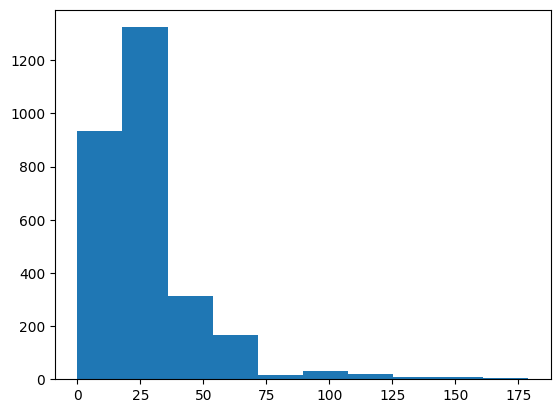

In [15]:
plt.hist(df_gpd_equipamento['Ponto medição'])
plt.show()

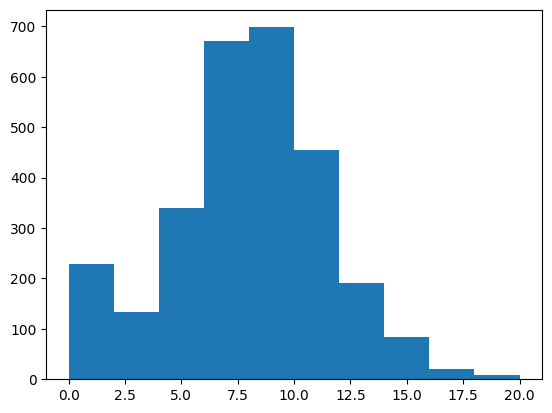

In [16]:
plt.hist(df_gpd_equipamento['Data'])
plt.show()

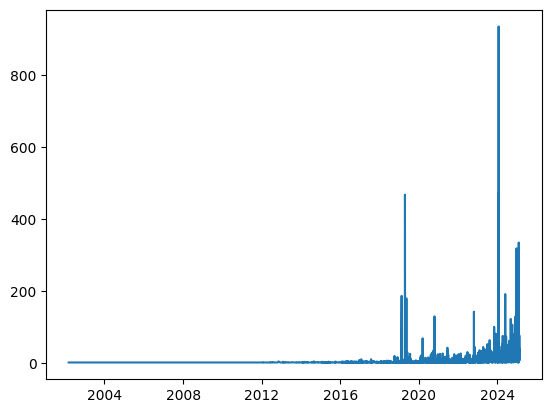

In [17]:
df_gpd_data = df.groupby('Data').agg({'Equipamento': 'nunique'})
plt.plot(df_gpd_data.index, df_gpd_data['Equipamento'])
plt.show()

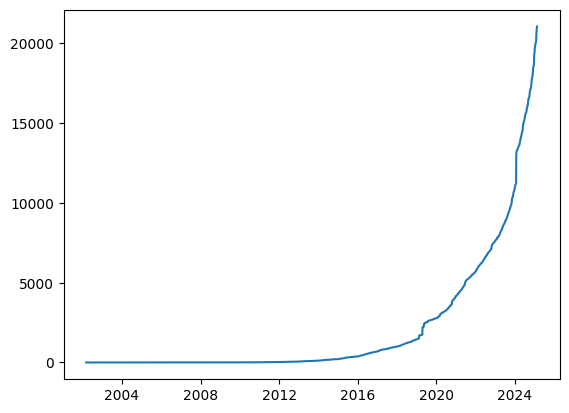

In [18]:
plt.plot(df_gpd_data.index, df_gpd_data['Equipamento'].cumsum())
plt.show()

In [19]:
df['Texto'].str.isnumeric().sum()

86255